In [4]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
import pandas as pd

In [6]:
#import dataset
data2018 = pd.read_csv("../podaci/atp_matches_2018.csv")
data2018.head()

FileNotFoundError: [Errno 2] File b'../podaci/atp_matches_2018.csv' does not exist: b'../podaci/atp_matches_2018.csv'

In [ ]:
data2018cleared = data2018[['tourney_id','tourney_name','surface','match_num','winner_id','loser_id','winner_rank','loser_rank']]

In [ ]:
print(data2018cleared.dtypes)

In [7]:
print("Broj redova: ", data2018cleared.shape[0])
print("Broj kolona: ", data2018cleared.shape[1])

NameError: name 'data2018cleared' is not defined

In [8]:
#empty field
data2018cleared.isna().any()

NameError: name 'data2018cleared' is not defined

In [9]:
data2018cleared = data2018cleared.dropna()

In [10]:
#check if match number is unique
print(data2018cleared['match_num'].isnull().values.any())
print(data2018cleared['match_num'].is_unique)

False
False


In [11]:
#add column match_id as unique
data2018cleared['match_id'] = data2018cleared.index
data2018cleared.head()

,tourney_id,tourney_name,surface,match_num,winner_id,loser_id,winner_rank,loser_rank,match_id
0,2018-M020,Brisbane,Hard,271,105992,104919,47.0,52.0,0
1,2018-M020,Brisbane,Hard,272,111577,111442,54.0,94.0,1
2,2018-M020,Brisbane,Hard,273,104797,106000,63.0,30.0,2
3,2018-M020,Brisbane,Hard,275,200282,105449,208.0,44.0,3
4,2018-M020,Brisbane,Hard,276,111581,105643,175.0,68.0,4


In [12]:
data2018cleared.to_csv(r'../podaciExport/atp_matches_2018_cleared.csv')

In [13]:
dataPlayers = pd.read_csv("../podaci/atp_players.csv")
dataPlayers.head()

,100001,Gardnar,Mulloy,R,19131122,USA
0,100002,Pancho,Segura,R,19210620.0,ECU
1,100003,Frank,Sedgman,R,19271002.0,AUS
2,100004,Giuseppe,Merlo,R,19271011.0,ITA
3,100005,Richard Pancho,Gonzales,R,19280509.0,USA
4,100006,Grant,Golden,R,19290821.0,USA


In [14]:
dataPlayers.columns=['player_id','first_name','last_name','hand','birth_date','country_code']
dataPlayers.head()

,player_id,first_name,last_name,hand,birth_date,country_code
0,100002,Pancho,Segura,R,19210620.0,ECU
1,100003,Frank,Sedgman,R,19271002.0,AUS
2,100004,Giuseppe,Merlo,R,19271011.0,ITA
3,100005,Richard Pancho,Gonzales,R,19280509.0,USA
4,100006,Grant,Golden,R,19290821.0,USA


In [15]:
dataPlayerscleared = dataPlayers[['player_id','first_name','last_name','country_code']]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code
0,100002,Pancho,Segura,ECU
1,100003,Frank,Sedgman,AUS
2,100004,Giuseppe,Merlo,ITA
3,100005,Richard Pancho,Gonzales,USA
4,100006,Grant,Golden,USA


In [16]:
print(dataPlayerscleared.dtypes)

player_id        int64
first_name      object
last_name       object
country_code    object
dtype: object


In [17]:
print("Broj redova: ", dataPlayerscleared.shape[0])
print("Broj kolona: ", dataPlayerscleared.shape[1])

Broj redova:  54974
Broj kolona:  4


In [18]:
#is there any empty field
dataPlayerscleared.isna().any()

player_id       False
first_name       True
last_name        True
country_code     True
dtype: bool

In [19]:
dataPlayerscleared=dataPlayerscleared.dropna()
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code
0,100002,Pancho,Segura,ECU
1,100003,Frank,Sedgman,AUS
2,100004,Giuseppe,Merlo,ITA
3,100005,Richard Pancho,Gonzales,USA
4,100006,Grant,Golden,USA


In [20]:
print(dataPlayerscleared['player_id'].is_unique)

True


In [21]:
#add new column winner with full name
dataPlayerscleared["full_name"] = dataPlayerscleared["first_name"] + " " + dataPlayerscleared["last_name"]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name
0,100002,Pancho,Segura,ECU,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden


In [22]:
dataPlayerscleared.to_csv(r'../podaciExport/atp_players_cleared.csv')

In [23]:
import pyodbc 
cstr = "DRIVER={Microsoft Access Text Driver (*.txt, *.csv)};Extensions=csv;Dbq=C:\\Users\\brank_000\\Desktop\\ASM\\Projekat\\python\\podaciExport"
connection = pyodbc.connect(cstr, autocommit=True)
cursor = connection.cursor()

query = " SELECT M.winner_id, P.full_name, COUNT(*) FROM atp_matches_2018_cleared.csv M left join atp_players_cleared.csv P on P.player_id = M.winner_id GROUP BY M.winner_id, P.full_name ORDER BY 3 DESC"

cursor.execute(query)

row = cursor.fetchone() 
while row: 

    print(row)
    #print(row[1])
    row = cursor.fetchone()
    

cursor.close()
connection.close()

(100644, 'Alexander Zverev', 58)
(106233, 'Dominic Thiem', 54)
(104925, 'Novak Djokovic', 53)
(103819, 'Roger Federer', 49)
(105223, 'Juan Martin Del Potro', 48)
(104731, 'Kevin Anderson', 48)
(104926, 'Fabio Fognini', 47)
(126774, 'Stefanos Tsitsipas', 46)
(104745, 'Rafael Nadal', 45)
(105227, 'Marin Cilic', 45)
(111575, 'Karen Khachanov', 44)
(105453, 'Kei Nishikori', 43)
(106421, 'Daniil Medvedev', 42)
(106432, 'Borna Coric', 40)
(106378, 'Kyle Edmund', 37)
(133430, 'Denis Shapovalov', 35)
(104755, 'Richard Gasquet', 35)
(104545, 'John Isner', 34)
(105683, 'Milos Raonic', 33)
(106043, 'Diego Sebastian Schwartzman', 33)
(104269, 'Fernando Verdasco', 33)
(104468, 'Gilles Simon', 33)
(105138, 'Roberto Bautista Agut', 32)
(105807, 'Pablo Carreno Busta', 31)
(104792, 'Gael Monfils', 30)
(200282, 'Alex De Minaur', 29)
(105676, 'David Goffin', 29)
(111202, 'Hyeon Chung', 29)
(105932, 'Nikoloz Basilashvili', 29)
(111797, 'Nicolas Jarry', 28)
(126207, 'Francis Tiafoe', 28)
(105332, 'Benoit P

In [24]:
import pyodbc 
cstr = "DRIVER={Microsoft Access Text Driver (*.txt, *.csv)};Extensions=csv;Dbq=C:\\Users\\brank_000\\Desktop\\ASM\\Projekat\\python\\podaciExport"
connection = pyodbc.connect(cstr, autocommit=True)
cursor = connection.cursor()

query = " SELECT M.loser_id, P.full_name, COUNT(*) FROM atp_matches_2018_cleared.csv M left join atp_players_cleared.csv P on P.player_id = M.loser_id GROUP BY M.loser_id, P.full_name ORDER BY 3 DESC"

cursor.execute(query)

row = cursor.fetchone() 
while row: 

    print(row)
    #print(row[1])
    row = cursor.fetchone()
    

cursor.close()
connection.close()

(106000, 'Damir Dzumhur', 31)
(104898, 'Robin Haase', 31)
(105173, 'Adrian Mannarino', 30)
(104999, 'Mischa Zverev', 29)
(105932, 'Nikoloz Basilashvili', 28)
(104269, 'Fernando Verdasco', 28)
(133430, 'Denis Shapovalov', 28)
(105332, 'Benoit Paire', 28)
(105077, 'Albert Ramos', 28)
(126774, 'Stefanos Tsitsipas', 27)
(105311, 'Joao Sousa', 26)
(126207, 'Francis Tiafoe', 26)
(105526, 'Jan Lennard Struff', 25)
(104919, 'Leonardo Mayer', 25)
(106043, 'Diego Sebastian Schwartzman', 25)
(105376, 'Peter Gojowczyk', 25)
(105916, 'Marton Fucsovics', 25)
(104755, 'Richard Gasquet', 24)
(105583, 'Dusan Lajovic', 24)
(104259, 'Philipp Kohlschreiber', 24)
(105216, 'Yuichi Sugita', 24)
(105449, 'Steve Johnson', 24)
(104468, 'Gilles Simon', 24)
(104198, 'Guillermo Garcia Lopez', 23)
(106065, 'Marco Cecchinato', 23)
(104871, 'Jeremy Chardy', 23)
(104926, 'Fabio Fognini', 23)
(105430, 'Radu Albot', 23)
(109739, 'Maximilian Marterer', 23)
(126094, 'Andrey Rublev', 23)
(200282, 'Alex De Minaur', 23)
(104

In [25]:
#add new column winner with full name
dataPlayerscleared["winner_full_name"] = dataPlayerscleared["first_name"] + " " + dataPlayerscleared["last_name"]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden


In [26]:
#add new column winner with full name
dataPlayerscleared["loser_full_name"] = dataPlayerscleared["first_name"] + " " + dataPlayerscleared["last_name"]
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name,loser_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden,Grant Golden


In [27]:
data_short2018=data2018cleared[['match_num','winner_id','loser_id','match_id']]
data_short2018.head()

,match_num,winner_id,loser_id,match_id
0,271,105992,104919,0
1,272,111577,111442,1
2,273,104797,106000,2
3,275,200282,105449,3
4,276,111581,105643,4


In [28]:
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name,loser_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden,Grant Golden


In [29]:
dataPlayers_short_winner = dataPlayerscleared[['player_id','winner_full_name']]
dataPlayers_short_winner.head()

,player_id,winner_full_name
0,100002,Pancho Segura
1,100003,Frank Sedgman
2,100004,Giuseppe Merlo
3,100005,Richard Pancho Gonzales
4,100006,Grant Golden


In [30]:
dataPlayers_short_loser=dataPlayerscleared[['player_id','loser_full_name']]
dataPlayers_short_loser.head()

,player_id,loser_full_name
0,100002,Pancho Segura
1,100003,Frank Sedgman
2,100004,Giuseppe Merlo
3,100005,Richard Pancho Gonzales
4,100006,Grant Golden


In [108]:
#merge three tables
merged_data=data_short2018.merge(dataPlayers_short_winner,left_on='winner_id', right_on='player_id').drop('player_id', axis=1).merge(dataPlayers_short_loser,left_on='loser_id', right_on='player_id').drop('player_id', axis=1)
merged_data.head()

,match_num,winner_id,loser_id,match_id,winner_full_name,player_id,loser_full_name
0,271,105992,104919,0,Ryan Harrison,104919,Leonardo Mayer
1,274,106378,104919,2237,Kyle Edmund,104919,Leonardo Mayer
2,290,105357,104919,1702,John Millman,104919,Leonardo Mayer
3,255,106432,104919,866,Borna Coric,104919,Leonardo Mayer
4,300,105932,104919,2005,Nikoloz Basilashvili,104919,Leonardo Mayer


In [32]:
player_asm = merged_data[['winner_id','loser_id','match_id','winner_full_name','loser_full_name']]
player_asm.head()

,winner_id,loser_id,match_id,winner_full_name,loser_full_name
0,105992,104919,0,Ryan Harrison,Leonardo Mayer
1,106378,104919,2237,Kyle Edmund,Leonardo Mayer
2,105357,104919,1702,John Millman,Leonardo Mayer
3,106432,104919,866,Borna Coric,Leonardo Mayer
4,105932,104919,2005,Nikoloz Basilashvili,Leonardo Mayer


In [33]:
#id player unique
list_winner = set(player_asm['winner_full_name'].unique())
list_loser = set(player_asm['loser_full_name'].unique())

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 378 različitih igrača


In [34]:
import numpy as np
import matplotlib.pyplot as plt

data_reduced = player_asm[['winner_full_name','loser_full_name','match_id']]

In [35]:
import networkx as nx
G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

In [36]:
#agregacija brojanjem
for _, winner_full_name, loser_full_name, _ in data_reduced.itertuples():
    if (winner_full_name, loser_full_name) in G.edges:
        G.edges[winner_full_name, loser_full_name]['weight'] += 1
    else:
        G.add_edge(winner_full_name, loser_full_name, weight=1)

In [37]:
print(G.edges.data("weight"))

#nx.draw_networkx(G)#-> crta mrežu, ne pokušavati za mrežu sa ovoliko čvorova i grana!

[('Adrian Bodmer', 'Mikhail Kukushkin', 1), ('Adrian Bodmer', 'Dmitry Popko', 1), ('Yoshihito Nishioka', 'Alex De Minaur', 1), ('Yoshihito Nishioka', 'Cameron Norrie', 1), ('Yoshihito Nishioka', 'Taylor Harry Fritz', 1), ('Yoshihito Nishioka', 'Pierre Hugues Herbert', 1), ('Yoshihito Nishioka', 'Philipp Kohlschreiber', 1), ('Yoshihito Nishioka', 'Fernando Verdasco', 2), ('Yoshihito Nishioka', 'Gastao Elias', 1), ('Yoshihito Nishioka', 'Denis Shapovalov', 1), ('Yoshihito Nishioka', 'Horacio Zeballos', 1), ('Yoshihito Nishioka', 'Nick Kyrgios', 1), ('Yoshihito Nishioka', 'Benoit Paire', 1), ('Yoshihito Nishioka', 'Marin Cilic', 1), ('Yoshihito Nishioka', 'Fabio Fognini', 1), ('Yoshihito Nishioka', 'Pablo Carreno Busta', 1), ('Yoshihito Nishioka', 'Marcos Baghdatis', 1), ('Yoshihito Nishioka', 'Andreas Seppi', 1), ('Yoshihito Nishioka', 'Tomas Berdych', 1), ('Yoshihito Nishioka', 'Roger Federer', 1), ('Yoshihito Nishioka', 'Denis Kudla', 1), ('Yoshihito Nishioka', 'Mirza Basic', 1), ('Dam

In [38]:
output = "models/undirected_count_aggregation2018.gml"

nx.write_gml(G, output)

In [39]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 378
Number of edges: 2454
Average degree:  12.9841


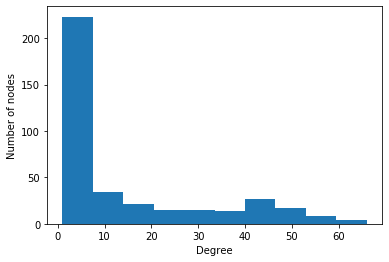

In [112]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    
    plt.show()

plot_degree_dist(G)

Text(0, 0.5, 'Frequency of nodes')

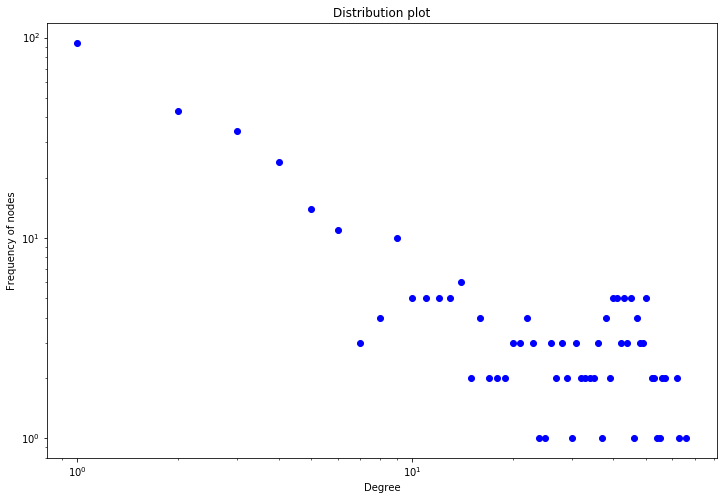

In [114]:
import networkx as nx
import matplotlib.pyplot as plt

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'bo') 
plt.title("Distribution plot")
plt.xlabel('Degree')
plt.ylabel('Frequency of nodes')
#plt.savefig('./output/Gd_degree_distributionLog.pdf')

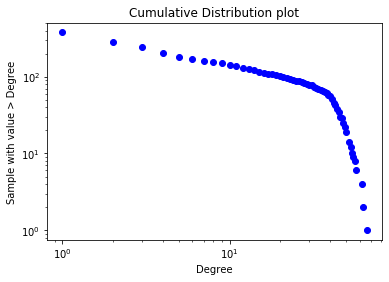

In [111]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, 'bo')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()

Čvorovi ego mreže igrača Novak Djokovic su ['Mirza Basic', 'Peter Polansky', 'Grigor Dimitrov', 'Rafael Nadal', 'Adrian Mannarino', 'Roberto Bautista Agut', 'Kei Nishikori', 'Damir Dzumhur', 'Richard Gasquet', 'Gael Monfils', 'Borna Coric', 'Alexandr Dolgopolov', 'Marton Fucsovics', 'John Millman', 'Horacio Zeballos', 'Kevin Anderson', 'Jaume Munar', 'Donald Young', 'Albert Ramos', 'John Isner', 'Nikoloz Basilashvili', 'Roger Federer', 'Karen Khachanov', 'Marco Cecchinato', 'Steve Johnson', 'Fernando Verdasco', 'Jeremy Chardy', 'Dusan Lajovic', 'Novak Djokovic', 'Marin Cilic', 'Milos Raonic', 'Alexander Zverev', 'Joao Sousa', 'Rogerio Dutra Silva', 'Tennys Sandgren', 'Kyle Edmund', 'Juan Martin Del Potro']


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{('Mirza Basic',
  'Gael Monfils'): Text(0.5212206004387929, 0.49954948840784796, '1'),
 ('Grigor Dimitrov',
  'Damir Dzumhur'): Text(0.6578669969923081, 0.6305144092951627, '1'),
 ('Grigor Dimitrov',
  'Fernando Verdasco'): Text(0.24633694631249897, -0.2798930511716443, '1'),
 ('Grigor Dimitrov',
  'Roberto Bautista Agut'): Text(0.8017761096690209, 0.5419060543138375, '1'),
 ('Grigor Dimitrov',
  'Tennys Sandgren'): Text(0.9079458110719159, -0.07727753528482006, '1'),
 ('Grigor Dimitrov',
  'Kyle Edmund'): Text(0.9428774114225011, -9.786438370795736e-08, '1'),
 ('Grigor Dimitrov',
  'John Millman'): Text(0.17412214864255987, 0.5685684936176986, '1'),
 ('Rafael Nadal',
  'Nikoloz Basilashvili'): Text(-0.04735944444839607, 0.1178584916973909, '1'),
 ('Rafael Nadal',
  'Damir Dzumhur'): Text(0.622935307234755, 0.7077919808260507, '2'),
 ('Rafael Nadal',
  'Gael Monfils'): Text(0.45772764619481304, 0.7433969646559353, '1'),
 ('Rafael Nadal',
  'Alexander Zverev'): Text(0.698660669496155, 

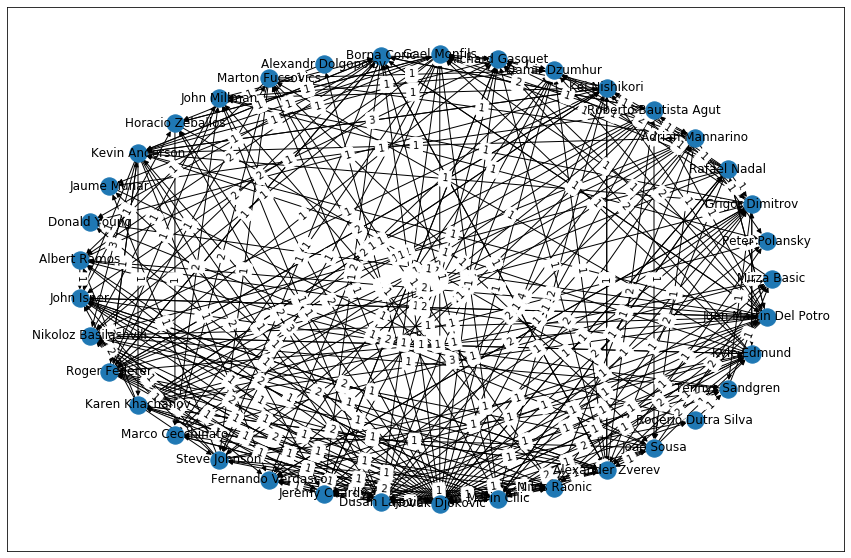

In [113]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Novak Djokovic')
print(f"Čvorovi ego mreže igrača Novak Djokovic su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [41]:
from collections import Counter
from operator import itemgetter
def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)     
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 94, 2: 44, 3: 33, 4: 25, 5: 13, 6: 11, 9: 11, 39: 8, 35: 6, 14: 6, 40: 6, 42: 6, 22: 5, 16: 5, 25: 5, 12: 5, 8: 5, 46: 5, 43: 5, 11: 5, 34: 5, 20: 4, 13: 4, 19: 4, 10: 4, 49: 4, 37: 4, 33: 4, 47: 3, 29: 3, 7: 3, 45: 2, 30: 2, 15: 2, 36: 2, 48: 2, 26: 2, 32: 2, 23: 2, 28: 2, 44: 2, 27: 2, 17: 2, 38: 1, 51: 1, 55: 1, 18: 1, 21: 1, 53: 1, 52: 1, 61: 1, 50: 1})


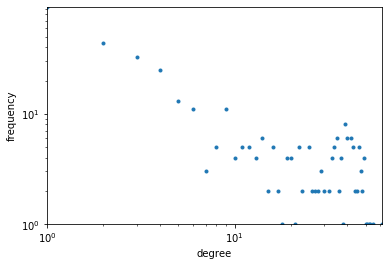

In [42]:
 plot_deg_frequency(G)

Counter({1: 94, 2: 42, 3: 34, 4: 24, 5: 14, 6: 12, 9: 9, 14: 7, 43: 6, 10: 6, 12: 5, 8: 5, 47: 5, 48: 5, 25: 4, 16: 4, 29: 4, 38: 4, 13: 4, 56: 3, 15: 3, 46: 3, 31: 3, 27: 3, 20: 3, 65: 3, 22: 3, 11: 3, 50: 3, 21: 2, 39: 2, 19: 2, 45: 2, 59: 2, 32: 2, 41: 2, 58: 2, 34: 2, 61: 2, 33: 2, 53: 2, 51: 2, 52: 2, 57: 2, 23: 2, 18: 2, 35: 2, 49: 2, 55: 2, 7: 2, 36: 2, 66: 1, 63: 1, 30: 1, 75: 1, 44: 1, 37: 1, 24: 1, 60: 1, 64: 1, 67: 1, 28: 1, 54: 1, 73: 1, 77: 1, 70: 1, 17: 1})


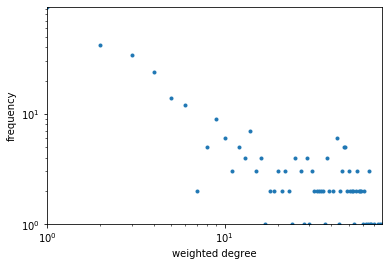

In [43]:
plot_deg_frequency(G, weighted = True)

Counter({14: 46, 13: 43, 16: 37, 15: 36, 12: 34, 11: 33, 10: 28, 8: 22, 17: 18, 9: 16, 7: 16, 18: 13, 19: 10, 20: 7, 6: 6, 5: 4, 4: 2, 22: 2, 21: 2, 23: 2, 24: 1})


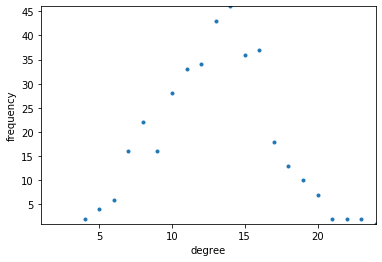

Counter({14: 46, 13: 43, 16: 37, 15: 36, 12: 34, 11: 33, 10: 28, 8: 22, 17: 18, 9: 16, 7: 16, 18: 13, 19: 10, 20: 7, 6: 6, 5: 4, 4: 2, 22: 2, 21: 2, 23: 2, 24: 1})


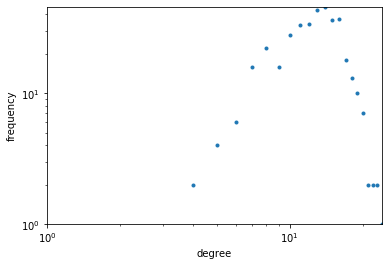

In [44]:
#slucajno generisana mreza Gnm ima normalnu distribuciju!
n = G.number_of_nodes()
m = G.number_of_edges()
Gnm = nx.gnm_random_graph(n, m) 

plot_deg_frequency(Gnm, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(Gnm, xscale = 'log', yscale = 'log')

0.034440655130310305
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 50, što je odstupanje od 2.037489812550937%
Counter({13: 52, 11: 50, 12: 44, 14: 37, 10: 33, 15: 28, 16: 27, 9: 21, 17: 19, 8: 18, 19: 13, 6: 9, 18: 8, 7: 7, 21: 4, 20: 3, 5: 2, 22: 1, 24: 1, 4: 1})


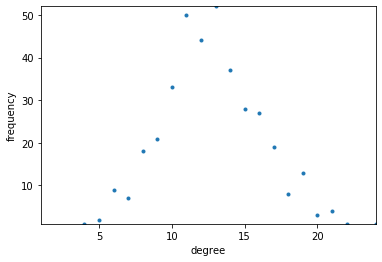

Counter({13: 52, 11: 50, 12: 44, 14: 37, 10: 33, 15: 28, 16: 27, 9: 21, 17: 19, 8: 18, 19: 13, 6: 9, 18: 8, 7: 7, 21: 4, 20: 3, 5: 2, 22: 1, 24: 1, 4: 1})


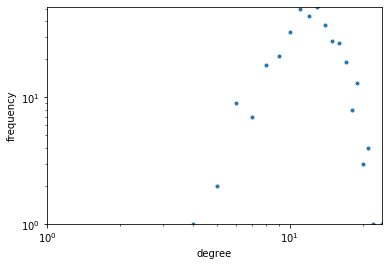

In [45]:
#Kako bi se ponašala Erdos-Renyi mreža sa koja ima isti broj čvorova n, a verovatnoća formiranja grane je takva da je očekivani broj grana u mreži m?
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

plot_deg_frequency(er_mreza, xscale = 'linear', yscale = 'linear')
plot_deg_frequency(er_mreza, xscale = 'log', yscale = 'log')
#Šta nam informacije o raspodeli stepena čvora govore o ovoj mreži?

# Da je mreža bila sa slučajnim vezivanjem, očekivali bismo da raspodela bude slična normalnoj raspodeli! Sto i lici!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [46]:
#Asortativnost (eng. assortativity) meri stepen tendencije čvorova mreže da se vezuju sa sličnim čvorovima. 
#U ovoj analizi ćemo prvo sprovesti analizu asortativnosti na osnovu stepena čvora, jer nas interesuje da li se međusobno vezuju čvorovi koji su sličnog stepena, 
#ili habovi (čvorovi velikog stepena) teže da se slabo međusobno vezuju, a mnogo vezuju sa čvorovima malog stepena.
#Uvodi se koeficijent asortativnosti r, koji je u opsegu od -1 do 1. 
#Mreža sa r = 1 iskazuje savršeno asortativno mešanje (perfect assortative mixing pattern), kad je r = 0 mreža je neasortativna ili neutralna, dok je u slučaju r = −1 mreža potpuno disasortativna.
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.18806487533073207
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.20325525650590734


In [47]:
#Kao što vidimo, mreža je neutralna tj. neasortativna, odnosno, čvorovi sličnog stepena uglavnom se ne vezuju međusobno.

In [116]:
#ANALIZA KOMUNA
#Stepen klasterisanja može se proceniti na osnovu koeficijenta klasterisanja.
id_igraca, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(id_igraca, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Maksimalni lokalni stepen klasterisanja: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan stepen klasterisanja: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

Maksimalni lokalni stepen klasterisanja: 0.13583004374561972
Prosečan stepen klasterisanja: 0.07424501923828807
Lokalni stepeni klasterisanja koji nisu nula:
                          id        cc
25           Henri Laaksonen  0.001894
6             Carlos Berlocq  0.008333
179         Bjorn Fratangelo  0.008929
5              Bernard Tomic  0.009375
99               Mikael Ymer  0.010417
..                       ...       ...
92            Vincent Millot  0.125000
178  Bernabe Zapata Miralles  0.125000
186        Miomir Kecmanovic  0.125000
105             Mate Valkusz  0.125000
28              Liam Caruana  0.135830

[204 rows x 2 columns]


Čvorovi ego mreže igrača Miomir Kecmanovic su ['Denis Istomin', 'Ryan Harrison', 'Miomir Kecmanovic']


{('Denis Istomin',
  'Ryan Harrison'): Text(0.24999996274709668, 0.43301271829021687, '1'),
 ('Denis Istomin',
  'Miomir Kecmanovic'): Text(0.2500000372529033, -0.43301270835610933, '1'),
 ('Ryan Harrison',
  'Miomir Kecmanovic'): Text(-0.5, -9.934107536579972e-09, '1')}

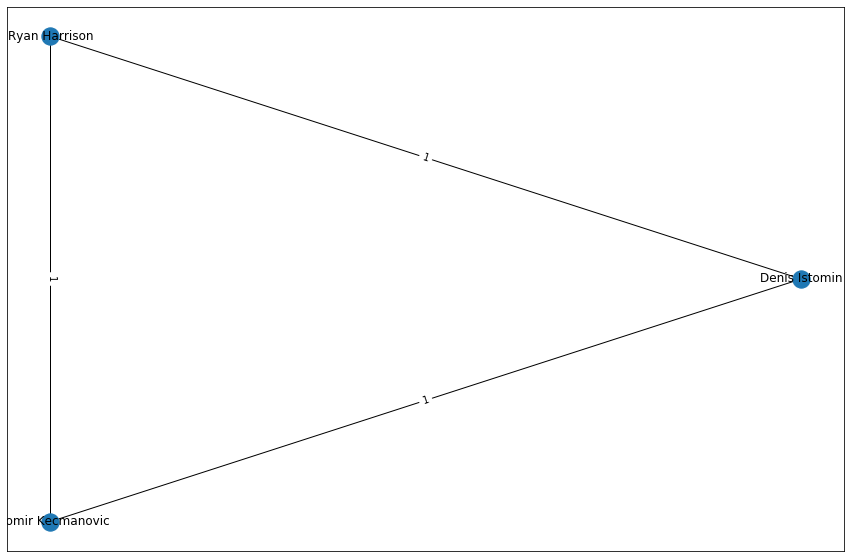

In [49]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Miomir Kecmanovic')
print(f"Čvorovi ego mreže igrača Miomir Kecmanovic su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Čvorovi ego mreže igrača Liam Caruana su ['Alex De Minaur', 'Steve Johnson', 'Andrey Rublev', 'Taylor Harry Fritz', 'Liam Caruana']


{('Alex De Minaur',
  'Taylor Harry Fritz'): Text(0.09549151233717518, -0.2938926630120157, '1'),
 ('Alex De Minaur',
  'Steve Johnson'): Text(0.654508480212244, 0.4755283023511464, '2'),
 ('Alex De Minaur',
  'Andrey Rublev'): Text(0.09549145273252935, 0.2938926212887637, '2'),
 ('Alex De Minaur',
  'Liam Caruana'): Text(0.6545085547180512, -0.4755282248651067, '1'),
 ('Steve Johnson',
  'Taylor Harry Fritz'): Text(-0.2500000074505807, 0.1816356154972723, '1'),
 ('Steve Johnson',
  'Liam Caruana'): Text(0.30901703493029536, 5.3644181319256745e-08, '1'),
 ('Andrey Rublev',
  'Taylor Harry Fritz'): Text(-0.8090170349302954, -6.55651103964594e-08, '2'),
 ('Andrey Rublev',
  'Liam Caruana'): Text(-0.24999999254941926, -0.18163562741820138, '1'),
 ('Taylor Harry Fritz',
  'Liam Caruana'): Text(-0.24999993294477343, -0.7694209117189807, '1')}

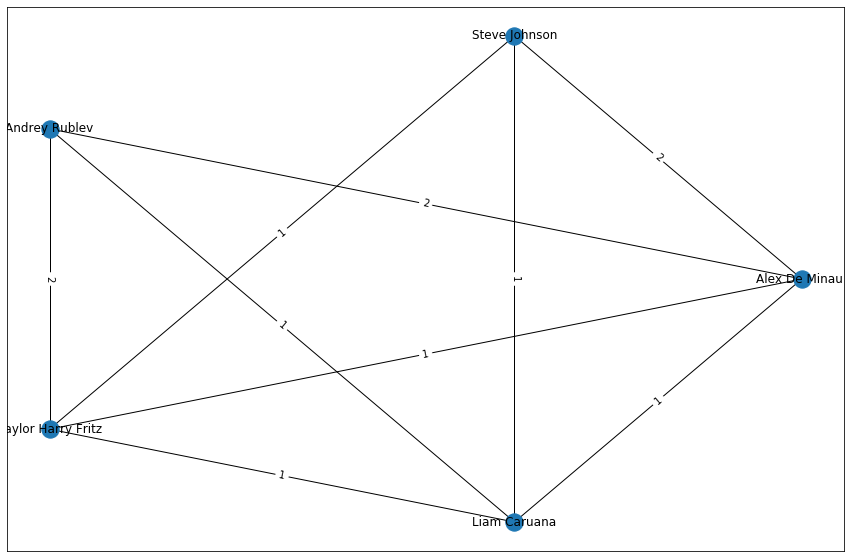

In [50]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Liam Caruana')
print(f"Čvorovi ego mreže igrača Liam Caruana su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Čvorovi ego mreže igrača Rafael Nadal su ['Diego Sebastian Schwartzman', 'Grigor Dimitrov', 'Rafael Nadal', 'Maximilian Marterer', 'Kei Nishikori', 'Damir Dzumhur', 'Guillermo Garcia Lopez', 'Martin Klizan', 'Stanislas Wawrinka', 'Richard Gasquet', 'Gael Monfils', 'David Ferrer', 'Jiri Vesely', 'Fabio Fognini', 'Mikhail Kukushkin', 'Leonardo Mayer', 'Denis Shapovalov', 'Dominic Thiem', 'Nikoloz Basilashvili', 'Guido Pella', 'Karen Khachanov', 'Benoit Paire', 'Simone Bolelli', 'Philipp Kohlschreiber', 'Dudi Sela', 'Victor Estrella', 'Vasek Pospisil', 'Novak Djokovic', 'Marin Cilic', 'Alexander Zverev', 'Alex De Minaur', 'Roberto Carballes Baena', 'David Goffin', 'Stefanos Tsitsipas', 'Juan Martin Del Potro', 'Aljaz Bedene']


{('Diego Sebastian Schwartzman',
  'Gael Monfils'): Text(0.4131759037053888, 0.4924038730266438, '2'),
 ('Diego Sebastian Schwartzman',
  'Richard Gasquet'): Text(0.49999997719217776, 0.500000008043904, '1'),
 ('Diego Sebastian Schwartzman',
  'Stefanos Tsitsipas'): Text(0.9330126563997316, -0.25000006929720575, '1'),
 ('Diego Sebastian Schwartzman',
  'Aljaz Bedene'): Text(0.9924038857890294, -0.08682396749596762, '1'),
 ('Diego Sebastian Schwartzman',
  'Benoit Paire'): Text(0.06698731189368956, -0.24999997989024006, '1'),
 ('Diego Sebastian Schwartzman',
  'Marin Cilic'): Text(0.5868240720386129, -0.4924038408510279, '1'),
 ('Diego Sebastian Schwartzman',
  'Jiri Vesely'): Text(0.24999997326750167, 0.43301270324199, '1'),
 ('Diego Sebastian Schwartzman',
  'Leonardo Mayer'): Text(0.06698731189368956, 0.25000004186817787, '1'),
 ('Diego Sebastian Schwartzman',
  'Rafael Nadal'): Text(0.9698462997204281, 0.17101007543513402, '3'),
 ('Diego Sebastian Schwartzman',
  'Maximilian Martere

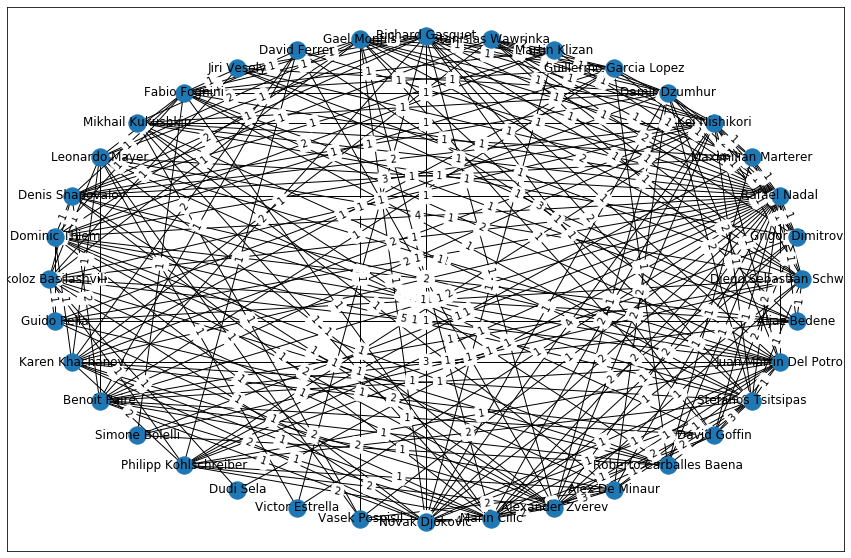

In [51]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Rafael Nadal')
print(f"Čvorovi ego mreže igrača Rafael Nadal su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Čvorovi ego mreže igrača Roger Federer su ['Lukas Lacko', 'Federico Delbonis', 'Mischa Zverev', 'Grigor Dimitrov', 'Yoshihito Nishioka', 'Adrian Mannarino', 'Gilles Simon', 'Jan Lennard Struff', 'Roberto Bautista Agut', 'Kei Nishikori', 'Andreas Seppi', 'Stanislas Wawrinka', 'Peter Gojowczyk', 'Richard Gasquet', 'Denis Kudla', 'Nick Kyrgios', 'Borna Coric', 'Marton Fucsovics', 'Fabio Fognini', 'Marius Copil', 'John Millman', 'Leonardo Mayer', 'Tomas Berdych', 'Thanasi Kokkinakis', 'Daniil Medvedev', 'Kevin Anderson', 'Dominic Thiem', 'Robin Haase', 'Ruben Bemelmans', 'Guido Pella', 'Hyeon Chung', 'Roger Federer', 'Benoit Paire', 'Jeremy Chardy', 'Philipp Kohlschreiber', 'Dusan Lajovic', 'Novak Djokovic', 'Matthew Ebden', 'Marin Cilic', 'Milos Raonic', 'Alexander Zverev', 'David Goffin', 'Filip Krajinovic', 'Juan Martin Del Potro', 'Aljaz Bedene']


{('Lukas Lacko',
  'Ruben Bemelmans'): Text(0.14033011342135304, -0.3473291928468284, '1'),
 ('Lukas Lacko',
  'Mischa Zverev'): Text(0.9806308449982266, 0.1378186815039033, '1'),
 ('Lukas Lacko',
  'Peter Gojowczyk'): Text(0.4477357502145471, 0.4972609571520538, '1'),
 ('Lukas Lacko',
  'Robin Haase'): Text(0.09549153629846707, -0.29389267559143917, '1'),
 ('Lukas Lacko',
  'Fabio Fognini'): Text(0.0954914766938228, 0.293892593138348, '1'),
 ('Lukas Lacko',
  'Denis Kudla'): Text(0.3126967012451376, 0.4635919327360425, '2'),
 ('Lukas Lacko',
  'Roger Federer'): Text(0.3126966118381712, -0.4635918959798451, '1'),
 ('Lukas Lacko',
  'Dusan Lajovic'): Text(0.5868240779448132, -0.49240385714421664, '1'),
 ('Lukas Lacko',
  'Milos Raonic'): Text(0.8345653726992674, -0.37157236862153425, '1'),
 ('Federico Delbonis',
  'Aljaz Bedene'): Text(0.9902680517080861, 1.0927518098724498e-08, '1'),
 ('Federico Delbonis',
  'Dominic Thiem'): Text(0.053660222094865095, -0.16514919953416485, '1'),
 ('Fe

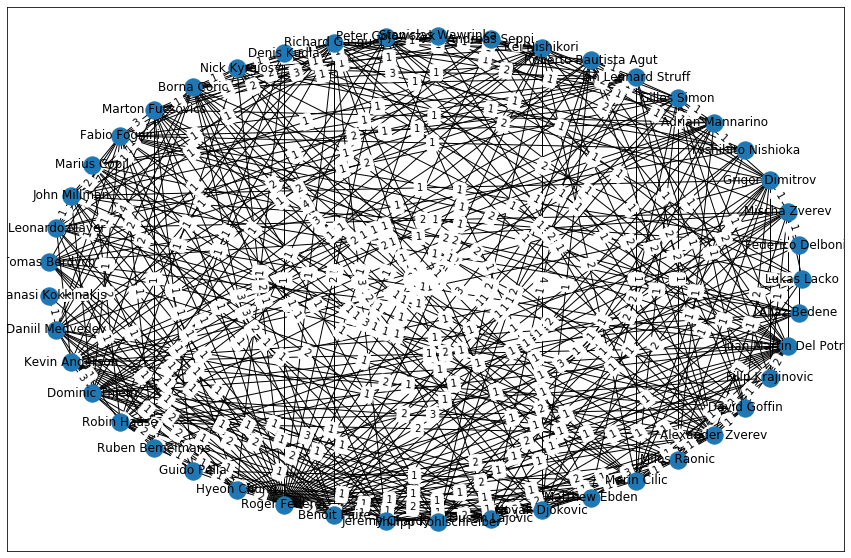

In [52]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Roger Federer')
print(f"Čvorovi ego mreže igrača Roger Federer su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [53]:
#CENTRALNOSTI
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G)

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df
df = calculate_centralities(G)
print(df)


                           DC        CC        BC           EVC
Adrian Bodmer        0.005305  0.275665  0.000062  3.002211e-03
Yoshihito Nishioka   0.053050  0.361791  0.001014  5.640369e-02
Damir Dzumhur        0.124668  0.399851  0.014533  1.150207e-01
David Agung Susanto  0.005305  0.011797  0.000169  9.631357e-11
Sanjar Fayziev       0.005305  0.280208  0.000480  2.495054e-03
...                       ...       ...       ...           ...
Ugo Humbert          0.013263  0.312456  0.004973  1.002377e-02
Jordan Thompson      0.029178  0.342245  0.001559  2.158254e-02
Ricardo Rodriguez    0.010610  0.277322  0.015544  2.122323e-03
Sandro Ehrat         0.002653  0.195569  0.000000  1.623735e-05
Liam Broady          0.010610  0.309463  0.000191  7.814624e-03

[378 rows x 4 columns]


In [54]:
#Korelacija - kako jedna metrika zavisi od druge, pozitivna korelacija znači da veća vrednost jedne od metrikka povlači veću vrednost druge metrike. 
#Interesantno je posmatrati Kendalovu tau korelaciju (korelaciju po rangu, ne po numeričkoj vrednosti) između različitih mera centralnosti ove mreže.
import scipy.stats as stats
labele = ['DC', 'CC', 'BC', 'EVC']
cross_correlation_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])
p_val_matrix = pd.DataFrame(columns = ['DC', 'CC', 'BC', 'EVC'], index = ['DC', 'CC', 'BC', 'EVC'])
for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(df[ind], df[col])
print(cross_correlation_matrix)

           DC        CC        BC       EVC
DC          1  0.824123   0.75968  0.825111
CC   0.824123         1  0.622456  0.946795
BC    0.75968  0.622456         1  0.597168
EVC  0.825111  0.946795  0.597168         1


In [55]:
#BC-posmatra samo puteve, najslabije sa EVC

In [56]:
print(p_val_matrix)
#p treba da bude sto manji, kako ne bi bilo da se slucajno desilo

               DC            CC            BC           EVC
DC   1.04299e-158   8.5077e-117   6.87411e-95  3.18977e-117
CC    8.5077e-117  2.77476e-184   3.13545e-69  1.27254e-165
BC    6.87411e-95   3.13545e-69  2.39367e-167   6.01494e-64
EVC  3.18977e-117  1.27254e-165   6.01494e-64  9.26949e-185


In [57]:
df = calculate_centralities(G)

df_ = df
for metric in labele:
    df_[f"{metric}_rank"] = df[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank']

df_.sort_values(['composite_rank'], ascending = True)
df_.sort_values(['CC'], ascending = False, inplace=True)
print(df_)

                         DC        CC        BC           EVC  DC_rank  \
Fabio Fognini      0.161804  0.420677  0.037800  1.438163e-01      1.0   
Dominic Thiem      0.145889  0.419040  0.015861  1.469169e-01      2.0   
Karen Khachanov    0.129973  0.414736  0.012973  1.298113e-01      8.5   
Fernando Verdasco  0.127321  0.414205  0.016123  1.250075e-01     11.5   
Adrian Mannarino   0.127321  0.413145  0.027363  1.183675e-01     11.5   
...                     ...       ...       ...           ...      ...   
Alejandro Mendoza  0.002653  0.002653  0.000000  6.450891e-13    331.5   
Shahin Khaledan    0.002653  0.002653  0.000000  6.450891e-13    331.5   
Mauricio Echazu    0.002653  0.002653  0.000000  6.450891e-13    331.5   
Dragos Dima        0.002653  0.002653  0.000000  6.450891e-13    331.5   
Duilio Beretta     0.002653  0.002653  0.000000  6.450891e-13    331.5   

                   CC_rank  BC_rank  EVC_rank  composite_rank  
Fabio Fognini          1.0      3.0       3.0  

In [72]:
#digraph sa usmerenom mrezom ka gubitniku
import networkx as nx
Gd = nx.DiGraph() # pravi praznu usmerenu mrežu
Gd.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

In [73]:
#agregacija brojanjem
for _, winner_full_name, loser_full_name, _ in data_reduced.itertuples():
    if (winner_full_name, loser_full_name) in Gd.edges:
        Gd.edges[winner_full_name, loser_full_name]['weight'] += 1
    else:
        Gd.add_edge(winner_full_name, loser_full_name, weight=1)

In [74]:
print(Gd.edges.data("weight"))

#nx.draw_networkx(G)#-> crta mrežu, ne pokušavati za mrežu sa ovoliko čvorova i grana!

[('Yoshihito Nishioka', 'Alex De Minaur', 1), ('Yoshihito Nishioka', 'Cameron Norrie', 1), ('Yoshihito Nishioka', 'Taylor Harry Fritz', 1), ('Yoshihito Nishioka', 'Pierre Hugues Herbert', 1), ('Yoshihito Nishioka', 'Philipp Kohlschreiber', 1), ('Yoshihito Nishioka', 'Fernando Verdasco', 1), ('Yoshihito Nishioka', 'Gastao Elias', 1), ('Yoshihito Nishioka', 'Denis Shapovalov', 1), ('Yoshihito Nishioka', 'Denis Kudla', 1), ('Yoshihito Nishioka', 'Mirza Basic', 1), ('Damir Dzumhur', 'Ruben Bemelmans', 1), ('Damir Dzumhur', 'Pierre Hugues Herbert', 1), ('Damir Dzumhur', 'Maximilian Marterer', 1), ('Damir Dzumhur', 'Michael Mmoh', 1), ('Damir Dzumhur', 'Fernando Verdasco', 1), ('Damir Dzumhur', 'Jan Lennard Struff', 1), ('Damir Dzumhur', 'Mikhail Kukushkin', 1), ('Damir Dzumhur', 'Paolo Lorenzi', 1), ('Damir Dzumhur', 'Marius Copil', 2), ('Damir Dzumhur', 'Peter Gojowczyk', 1), ('Damir Dzumhur', 'Denis Kudla', 1), ('Damir Dzumhur', 'Jiri Vesely', 1), ('Damir Dzumhur', 'Radu Albot', 1), ('Dam

In [75]:
output = "models/directed_count_aggregation2018.gml"

nx.write_gml(Gd, output)

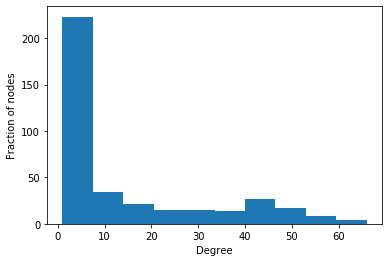

In [76]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(Gd):
    degrees = [Gd.degree(n) for n in Gd.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    
    plt.show()

plot_degree_dist(Gd)
#plt.savefig('./output/Gd_degree_distributionHist.pdf')

Text(0, 0.5, 'Frequency')

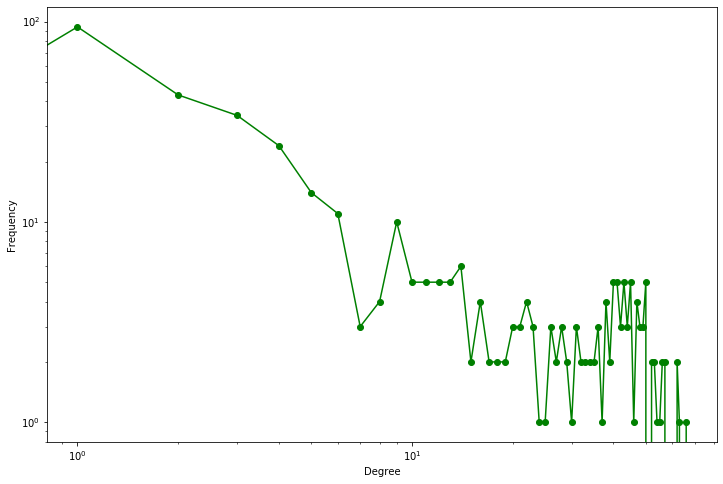

In [109]:
import networkx as nx
import matplotlib.pyplot as plt

degree_freq = nx.degree_histogram(Gd)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
#plt.savefig('./output/Gd_degree_distributionLog.pdf')

In [ ]:
#add country and rank but first category for ranking 1-20

,match_num,winner_id,loser_id,match_id,winner_full_name,player_id,loser_full_name
0,271,105992,104919,0,Ryan Harrison,104919,Leonardo Mayer
1,274,106378,104919,2237,Kyle Edmund,104919,Leonardo Mayer
2,290,105357,104919,1702,John Millman,104919,Leonardo Mayer
3,255,106432,104919,866,Borna Coric,104919,Leonardo Mayer
4,300,105932,104919,2005,Nikoloz Basilashvili,104919,Leonardo Mayer


In [118]:
dataPlayerscleared.head()

,player_id,first_name,last_name,country_code,full_name,winner_full_name,loser_full_name
0,100002,Pancho,Segura,ECU,Pancho Segura,Pancho Segura,Pancho Segura
1,100003,Frank,Sedgman,AUS,Frank Sedgman,Frank Sedgman,Frank Sedgman
2,100004,Giuseppe,Merlo,ITA,Giuseppe Merlo,Giuseppe Merlo,Giuseppe Merlo
3,100005,Richard Pancho,Gonzales,USA,Richard Pancho Gonzales,Richard Pancho Gonzales,Richard Pancho Gonzales
4,100006,Grant,Golden,USA,Grant Golden,Grant Golden,Grant Golden


In [3]:
dataPlayerscleared.loc[dataPlayerscleared['player_id']==100002]                    

NameError: name 'dataPlayerscleared' is not defined

In [2]:
filter = dataPlayerscleared["player_id"].isin([100002, 100003, 100004 ]) 
dataPlayerscleared[filter]

NameError: name 'dataPlayerscleared' is not defined